# Convex-hull approximation test

## 

In some cases if

In [1]:
%reload_ext autoreload
%autoreload 2

import sys
import os

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams.update({'figure.max_open_warning': 0})

In [2]:
sys.path.append('../')
from vis.utils import io
from vis.generators import dtlz2
from vis.generators import c2dtlz2
from vis.generators import c0dtlz2

# load the data where the depth contours were not possible to compute
# fpath = "../data/dtlz2-nbi/8d/dataf.csv"
fpath = "../data/c2dtlz2-nbi/8d/dataf.csv"
# fpath = "../data/c0dtlz2-nbi/8d/dataf.csv"
F = np.loadtxt(fpath, delimiter=',')

# generate a random data points that are on the same surface as `F`
LB, UB = np.mean(np.min(F, axis=0)), np.mean(np.max(F, axis=0))
r = UB - LB

path, _ = os.path.split(fpath)
dirs = path.split('/')
frontname = dirs[-2].split('-')[0]

if frontname == 'dtlz2':
    R, _ = dtlz2.surface(r=r, n=F.shape[0], m=F.shape[1], mode='lhcl2')
elif frontname == 'c2dtlz2':
    R, _, _ = c2dtlz2.surface(r=r, n=210000, m=F.shape[1], mode='lhcl2')
elif frontname == 'c0dtlz2':
    R, _, _ = c0dtlz2.surface(r=r, n=5000, m=F.shape[1])

print(F.shape)
print(R.shape)

(3872, 8)
(3882, 8)


Projecting on a simplex and collapsing.
Computing depth contour 0 ...
Computing depth contour 1 ...
Computing depth contour 2 ...
Computing depth contour 3 ...
Computing depth contour 4 ...
Plotting palette-star-viz.
Using depth contours ndarray.


<IPython.core.display.Javascript object>


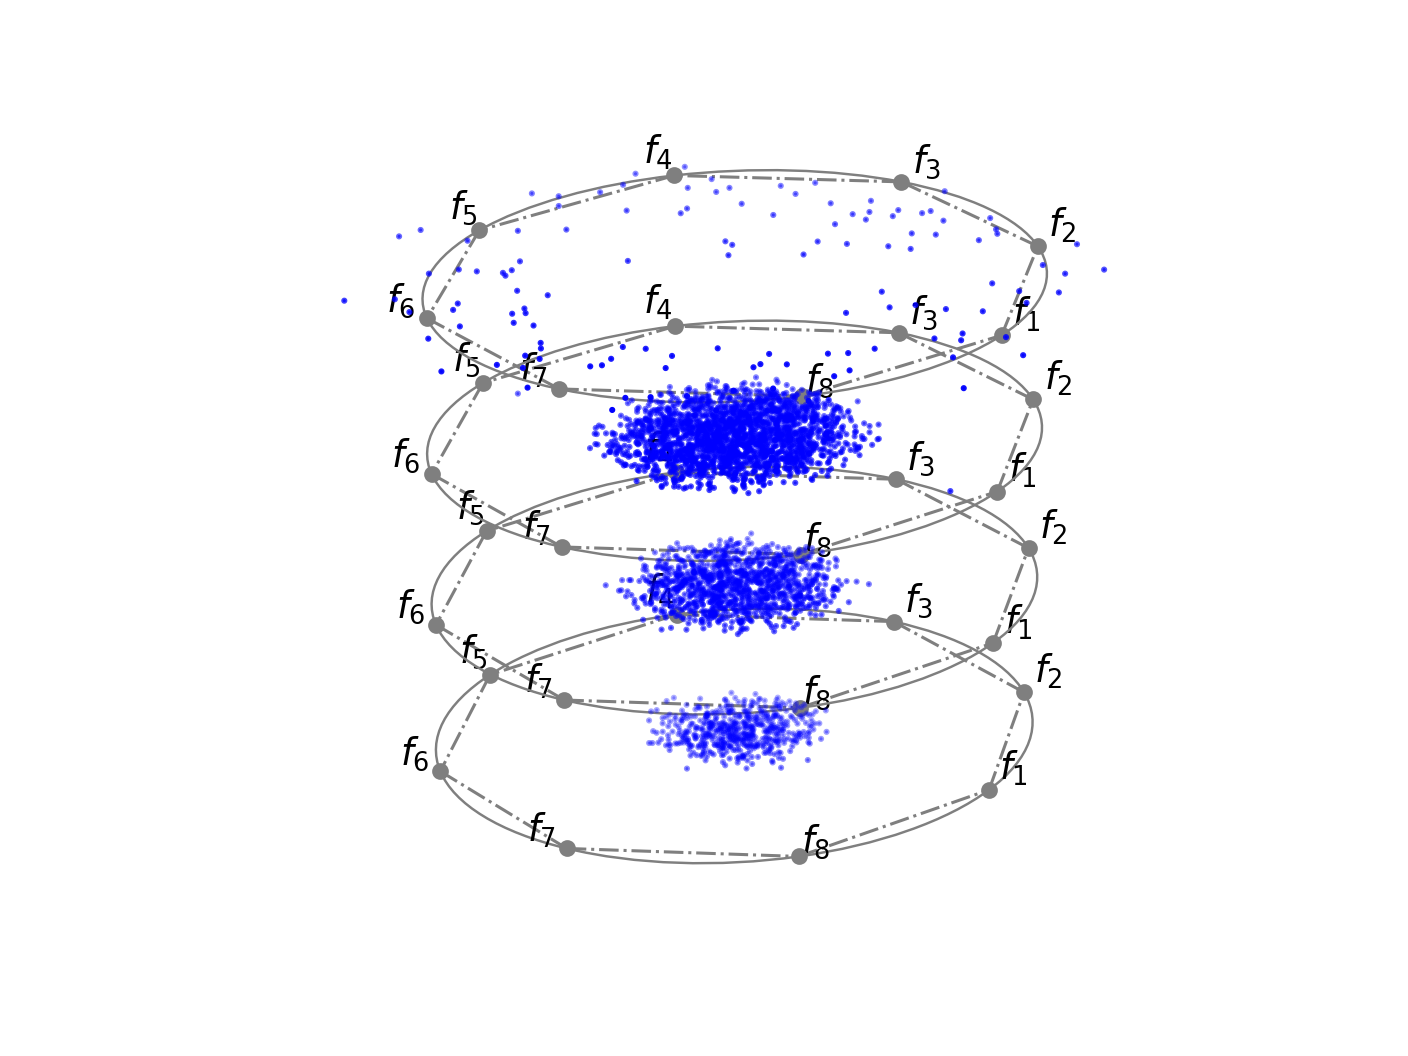

In [3]:
%matplotlib notebook
from vis.tda import simple_shape
from vis.plotting import paletteviz

# Now find depth contours from `R` and save in a temp file
L = simple_shape.depth_contours(R, verbose=True)
io.savetxt(os.path.join("ref-layer-temp.csv"), L, fmt='{:d}', delimiter=',')

paletteviz.plot(R, plt=plt, depth_contours=L, mode='star', n_partitions=4, s=1, c='blue', verbose=True)
plt.show()

5
126
2078
1147
421
100
total = 3872
6
126
2078
1147
421
104
6
total = 3882
Plotting palette-radviz.
Using depth contours ndarray.


<IPython.core.display.Javascript object>


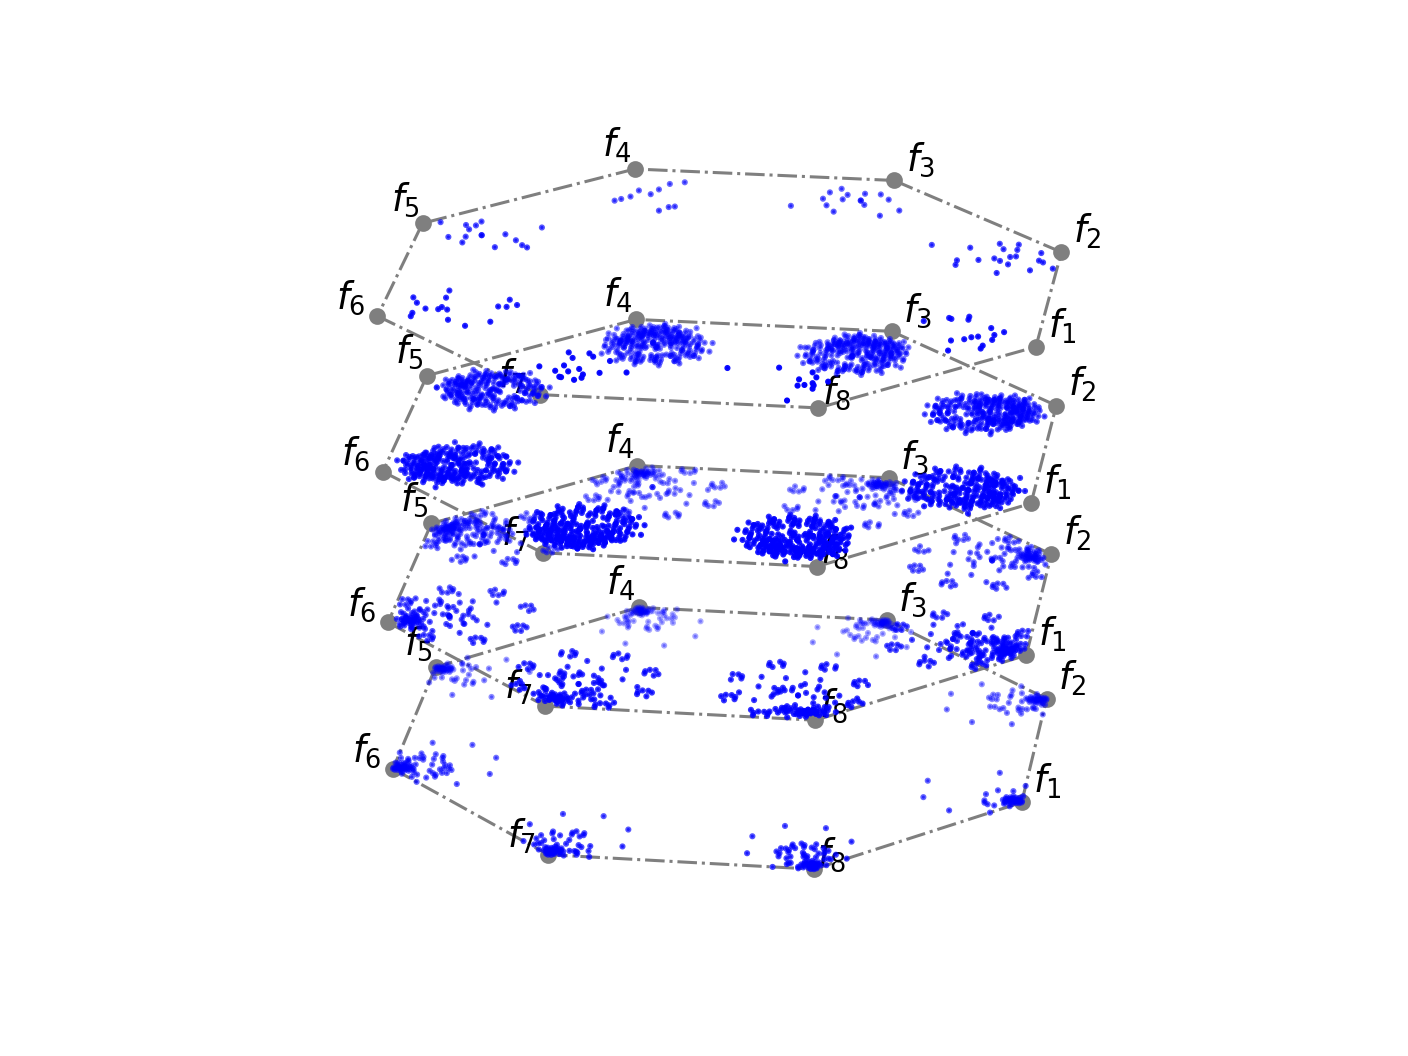

In [6]:
%matplotlib notebook
from vis.plotting import paletteviz

# Load the layers 
L = io.loadtxt("ref-layer-temp.csv", delimiter=',', dtype=int)

Id = np.arange(0,F.shape[0]).astype(int)
S = []
for l in L:
    s = []
    for i in l.astype(int):
        if Id.shape[0] > 0:
            j = np.argmin(np.linalg.norm(F[Id]-R[i], axis=1))
            s.append(Id[j])
            Id = np.delete(Id, j)
        else:
            break
    if len(s) > 0:
        S.append(np.array(s).astype(int))
    
S = np.array(S, dtype=object)

print(S.shape[0])
s = 0
for l in S:
    print(l.shape[0])
    s = s + l.shape[0]
print("total =", s)

print(L.shape[0])
s = 0
for l in L:
    print(l.shape[0])
    s = s + l.shape[0]
print("total =", s)
    
paletteviz.plot(F, plt=plt, depth_contours=S, mode='radviz', n_partitions=4, s=1, c='blue', verbose=True)
plt.show()